In [1]:
#	Attribute	Description
#1	Age	Age
#2	Sex	Sex
#3	Cp	Chest Pain Type (4 values)
#4	Trestbps	Rest Blood Pressure in mm Hg at admission to the hospital
#5	Chol	Serum Cholestoral in mg/dl
#6	Fbs	Fasting Blood Sugar  if > 120 mg/dl (1 = true; 0 = false)
#7	Restecg	Resting Electrocardiographic Result (values 0,1,2)
#8	Thalach	Max. Heart Rate
#9	Exang	Exercise Induced Angina (1 = yes; 0 = no)
#10	Oldpeak	St Depression Induced by Exercise Relative to Rest
#11	Slope	The Slope of The Peak Exercise St Segment
#12	Ca	Number of major vessels (0-3) colored by flourosopy
#13	Thal	3 = Normal; 6 = Fixed defect; 7 = Reversable defect
#4	Num	Diagnosis of Heart Disease (angiographic disease status)


In [2]:
#Load Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### reading data into Jupyter

In [3]:
heartdata = pd.read_csv('heart.csv')
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Summary statistics 

In [4]:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Exploring the data and its dimensions

In [5]:
print('Total number of rows: ', heartdata.shape[0])
print('Total number of columns: ', heartdata.shape[1])

Total number of rows:  303
Total number of columns:  14


#### checking for missing values

In [6]:
heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Exploration and Visualization

#### creating categories

In [7]:
heartdata['sex'].replace(0, 'Female', inplace=True) 
heartdata['sex'].replace(1,'Male', inplace=True)
heartdata['fbs'].replace(1,'True', inplace=True)
heartdata['fbs'].replace(0,'False', inplace=True)
heartdata['exang'].replace(1,'yes', inplace=True)
heartdata['exang'].replace(0,'no', inplace=True)
heartdata['target'].replace(1,'Y', inplace=True)
heartdata['target'].replace(0,'N', inplace=True)

#### Univariate exploration of categorical data

##### Distribution of the target variable

In [8]:
heartdata['target'].value_counts(normalize=True)

Y    0.544554
N    0.455446
Name: target, dtype: float64

Text(0.5, 1.0, 'Distribution of Target Variable')

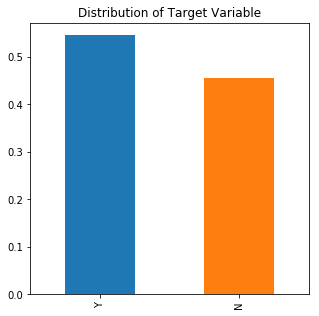

In [9]:
heartdata['target'].value_counts(normalize=True).plot.bar(figsize=(5, 5))
plt.title('Distribution of Target Variable')

##### Distribution of Gender variable

In [10]:
heartdata['sex'].value_counts(normalize=True)

Male      0.683168
Female    0.316832
Name: sex, dtype: float64

Text(0.5, 1.0, 'Distribution of Gender Variable')

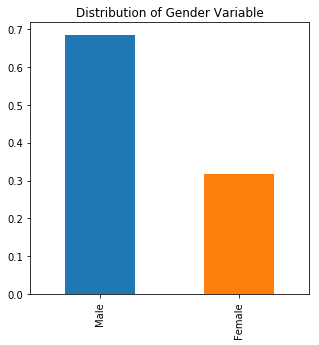

In [11]:
heartdata['sex'].value_counts(normalize=True).plot.bar(figsize=(5, 5))
plt.title('Distribution of Gender Variable')

##### Distribution of Fasting Blood Sugar variable

In [12]:
heartdata['fbs'].value_counts(normalize=True)

False    0.851485
True     0.148515
Name: fbs, dtype: float64

Text(0.5, 1.0, 'Distribution of Fasting Blood Sugar Variable')

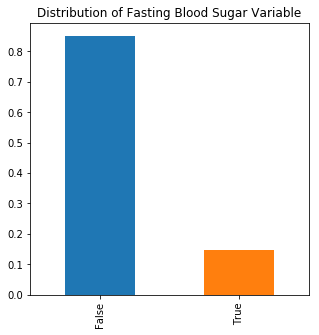

In [13]:
heartdata['fbs'].value_counts(normalize=True).plot.bar(figsize=(5, 5))
plt.title('Distribution of Fasting Blood Sugar Variable')

##### Distribution of Exercise Induced Angina variable

In [14]:
heartdata['exang'].value_counts(normalize=True)

no     0.673267
yes    0.326733
Name: exang, dtype: float64

Text(0.5, 1.0, 'Distribution of Exercise Induced Angina Variable')

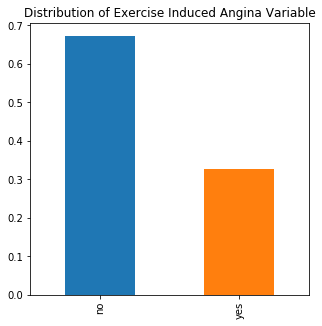

In [15]:
heartdata['exang'].value_counts(normalize=True).plot.bar(figsize=(5, 5))
plt.title('Distribution of Exercise Induced Angina Variable')

#### Bivariate exploration of categorical variable with respect to the target

In [16]:
Gender=pd.crosstab(heartdata['sex'],heartdata['target']) 
Fasting_Blood_sugar=pd.crosstab(heartdata['fbs'],heartdata['target']) 
Exercise_Angina=pd.crosstab(heartdata['exang'],heartdata['target']) 

print(Gender)
print(Fasting_Blood_sugar)
print(Exercise_Angina)

target    N   Y
sex            
Female   24  72
Male    114  93
target    N    Y
fbs             
False   116  142
True     22   23
target   N    Y
exang          
no      62  142
yes     76   23


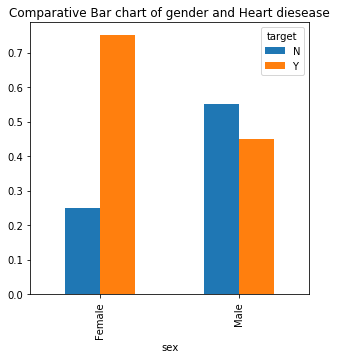

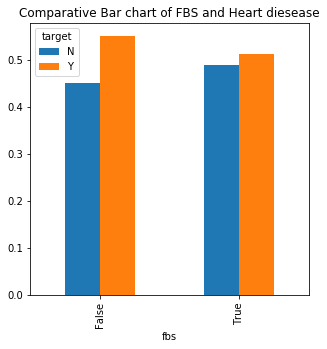

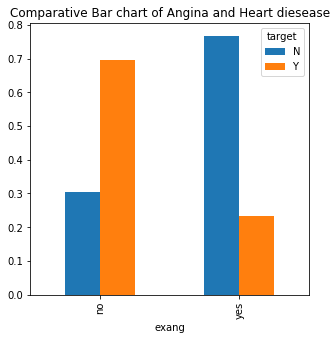

In [17]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(5,5))
plt.title('Comparative Bar chart of gender and Heart diesease')
plt.show() 
Fasting_Blood_sugar.div(Fasting_Blood_sugar.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(5,5)) 
plt.title('Comparative Bar chart of FBS and Heart diesease')
plt.show() 
Exercise_Angina.div(Exercise_Angina.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(5,5)) 
plt.title('Comparative Bar chart of Angina and Heart diesease')
plt.show() 


### Univeriate continuous data exploration

#### Distribution of Age Variable

Text(0.5, 1.0, 'Distribution of Age')

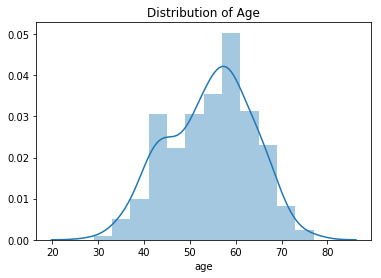

In [18]:
sns.distplot(heartdata['age'])
plt.title('Distribution of Age')

#### Distribution of Rest Blood Pressure Variable

Text(0.5, 1.0, 'Rest Blood Pressure ')

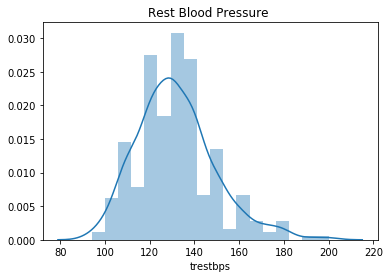

In [19]:
sns.distplot(heartdata['trestbps'])
plt.title('Rest Blood Pressure ')

#### Distribution of Serum Cholestoral Variable

Text(0.5, 1.0, 'Serum Cholestoral ')

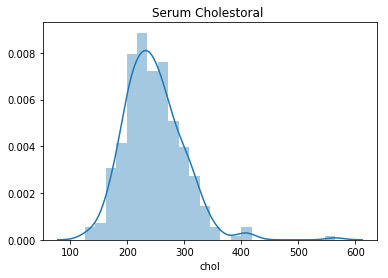

In [20]:
sns.distplot(heartdata['chol'])
plt.title('Serum Cholestoral ')

#### Distribution of Max. Heart Rate Variable

Text(0.5, 1.0, 'Max. Heart Rate')

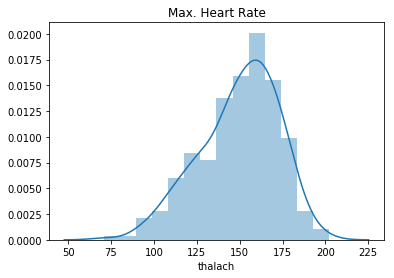

In [21]:
sns.distplot(heartdata['thalach'])
plt.title('Max. Heart Rate')

#### Distribution of Depression Induced by Exercise Variable

Text(0.5, 1.0, 'Depression Induced by Exercise')

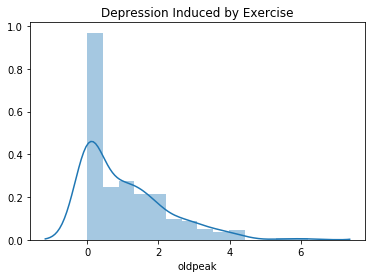

In [22]:
sns.distplot(heartdata['oldpeak'])
plt.title('Depression Induced by Exercise')

### Bivariate Continuous data exploration

#### Scatterplot Matrix to visualize Histograms correlations

In [23]:
from pandas.tools.plotting import scatter_matrix

Text(0.5, 1.0, 'ScatterPlot Matrix')

<Figure size 720x720 with 0 Axes>

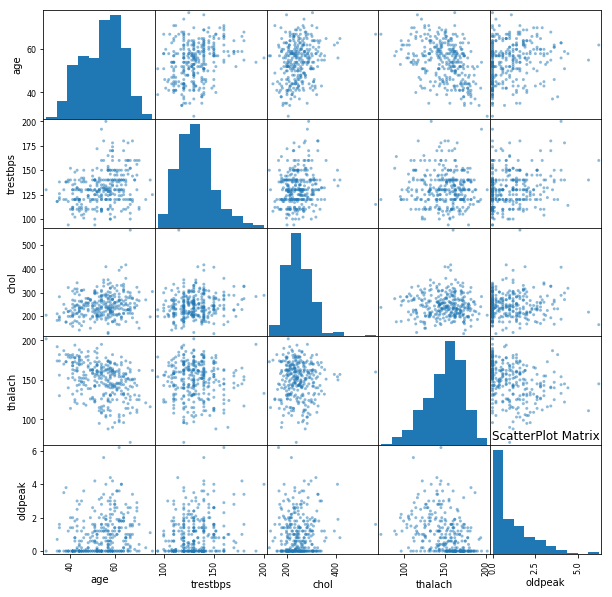

In [24]:
fig = plt.figure(figsize = (10, 10))
scatter_matrix(heartdata[['age','trestbps','chol','thalach','oldpeak']], figsize = (10, 10))
plt.title('ScatterPlot Matrix')

#### Plotting a Heatmap to show direction and strength of correlations

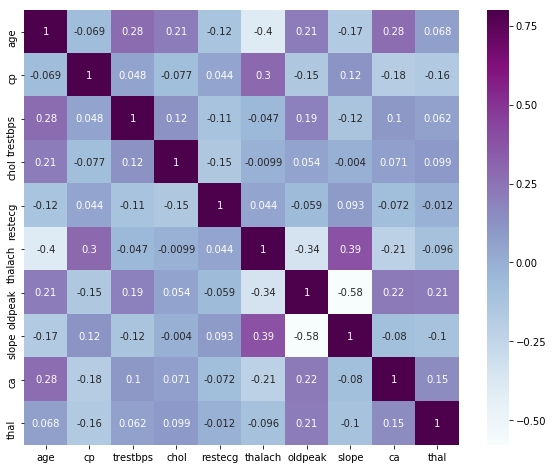

In [25]:
matrix = heartdata.corr()
fig = plt.figure(figsize=(10, 8)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)

# BUILDING MACHINE LEARNING MODELS

In [26]:
import sklearn
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score


#### Feature engineering 

In [27]:
heartdata['sex'].replace('Female',0, inplace=True) 
heartdata['sex'].replace('Male',1, inplace=True)
heartdata['fbs'].replace('True',1, inplace=True)
heartdata['fbs'].replace('False',0, inplace=True)
heartdata['exang'].replace('yes',1, inplace=True)
heartdata['exang'].replace('no',0, inplace=True)
heartdata['target'].replace('Y',1, inplace=True)
heartdata['target'].replace('N',0, inplace=True)

#### Separating the features from the target 

In [30]:
X = heartdata.drop('target', 1)
y = heartdata.target

#### Creating the training and trainig tests 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 13) (76, 13) (227,) (76,)


## Pipelines for Data Normalization and Algorithms

### Logistic Regression

In [32]:
estimators = []
estimators.append(('normalizer', MinMaxScaler()))
estimators.append(('LR', LogisticRegression()))
LR_model = Pipeline(estimators).fit(X_train, y_train)
print('Accuracy of the Logistic Regression on training set {:.4f}: '.format(LR_model.score(X_train, y_train)))
print('Accuracy of the Logistic Regression on testing set {:.4f}: '.format(LR_model.score(X_test, y_test)))

Accuracy of the Logistic Regression on training set 0.8634: 
Accuracy of the Logistic Regression on testing set 0.7632: 


#### Confusion matrix of the logistic Regression

In [33]:
predicted_1 = LR_model.predict(X_test)
print(confusion_matrix(predicted_1, y_test))

[[28  7]
 [11 30]]


In [34]:
LR_precision = precision_score(predicted_1, y_test)
LR_recall = recall_score(predicted_1,y_test)
LR_ROC_AUC =roc_auc_score(predicted_1, y_test)

print('Logistic Regression precision {:.4f}: '.format(LR_precision))
print('Logistic Regression recall {:.4f}: '.format(LR_recall))
print('Logistic Regression roc_auc {:.4f}: '.format(LR_ROC_AUC))

Logistic Regression precision 0.8108: 
Logistic Regression recall 0.7317: 
Logistic Regression roc_auc 0.7659: 


### KNearestNeighbor

In [35]:
estimators = []
estimators.append(('normalizer', MinMaxScaler()))
estimators.append(('KNN', KNeighborsClassifier()))
KNN_model = Pipeline(estimators).fit(X_train, y_train)
print('Accuracy of the KNearestNeighbor on training set {:.4f}: '.format(KNN_model.score(X_train, y_train)))
print('Accuracy of the KNearestNeighbor on testing set {:.4f}: '.format(KNN_model.score(X_test, y_test)))

Accuracy of the KNearestNeighbor on training set 0.8590: 
Accuracy of the KNearestNeighbor on testing set 0.7632: 


#### Confusion matrix of the KNN

In [36]:
predicted_2 = KNN_model.predict(X_test)
print(confusion_matrix(predicted_2, y_test))

[[28  7]
 [11 30]]


In [37]:
KNN_precision = precision_score(predicted_2, y_test)
KNN_recall = recall_score(predicted_2,y_test)
KNN_ROC_AUC =roc_auc_score(predicted_2, y_test)

print('KNearestNeighbor precision {:.4f}: '.format(KNN_precision))
print('KNearestNeighbor recall {:.4f}: '.format(KNN_recall))
print('KNearestNeighbor roc_auc {:.4f}: '.format(KNN_ROC_AUC))

KNearestNeighbor precision 0.8108: 
KNearestNeighbor recall 0.7317: 
KNearestNeighbor roc_auc 0.7659: 


### DecisionTreeClassifier

In [38]:
estimators = []
estimators.append(('normalizer', MinMaxScaler()))
estimators.append(('DTC', DecisionTreeClassifier()))
DT_model = Pipeline(estimators).fit(X_train, y_train)
print('Accuracy of the DecisionTreeClassifier on training set {:.4f}: '.format(DT_model.score(X_train, y_train)))
print('Accuracy of the DecisionTreeClassifier on testing set {:.4f}: '.format(DT_model.score(X_test, y_test)))

Accuracy of the DecisionTreeClassifier on training set 1.0000: 
Accuracy of the DecisionTreeClassifier on testing set 0.7895: 


#### Confusion matrix of the DecisionTreeClassification

In [39]:
predicted_3 = DT_model.predict(X_test)
print(confusion_matrix(predicted_3, y_test))

[[29  6]
 [10 31]]


In [40]:
DT_precision = precision_score(predicted_3, y_test)
DT_recall = recall_score(predicted_3,y_test)
DT_ROC_AUC =roc_auc_score(predicted_3, y_test)

print('Decision Tree precision {:.4f}: '.format(DT_precision))
print('Decision Tree recall {:.4f}: '.format(DT_recall))
print('Decision Tree roc_auc {:.4f}: '.format(DT_ROC_AUC))

Decision Tree precision 0.8378: 
Decision Tree recall 0.7561: 
Decision Tree roc_auc 0.7923: 


### Random Forest Classifier

In [41]:
estimators = []
estimators.append(('normalizer', MinMaxScaler()))
estimators.append(('RF', RandomForestClassifier()))
RF_model = Pipeline(estimators).fit(X_train, y_train)
print('Accuracy of the Random Forest Classifier on training set {:.4f}: '.format(RF_model.score(X_train, y_train)))
print('Accuracy of the Random Forest Classifier on testing set {:.4f}: '.format(RF_model.score(X_test, y_test)))

Accuracy of the Random Forest Classifier on training set 0.9956: 
Accuracy of the Random Forest Classifier on testing set 0.7500: 


#### Confusion matrix of the Random Forest

In [42]:
predicted_4 = RF_model.predict(X_test)
print(confusion_matrix(predicted_4, y_test))

[[29  9]
 [10 28]]


In [43]:
RF_precision = precision_score(predicted_4, y_test)
RF_recall = recall_score(predicted_4,y_test)
RF_ROC_AUC =roc_auc_score(predicted_4, y_test)

print('Random Forest precision {:.4f}: '.format(RF_precision))
print('Random Forest recall {:.4f}: '.format(RF_recall))
print('Random Forest roc_auc {:.4f}: '.format(RF_ROC_AUC))

Random Forest precision 0.7568: 
Random Forest recall 0.7368: 
Random Forest roc_auc 0.7500: 


## LOGISTIC REGRESSION HYPERPARAMETER TUNNING
The logistic regression proved to be the best model among the four. This is because from the training and testing accuracies,
the model seems not to underfit or over fit. 

In [44]:
scaler = MinMaxScaler()
X_trained_scaled =scaler.fit(X_train)
X_test_scaled =scaler.transform(X_test)

In [82]:
Logit_model = LogisticRegression()

In [83]:
pipe = Pipeline(steps=[('normalizer', MinMaxScaler()),
                           ('logistic', Logit_model)])

In [84]:

C = np.logspace(-8, 8, 100)
penalty = ['l1', 'l2']
parameters = dict(logistic__C=C,
                  logistic__penalty=penalty)

In [85]:
clf = GridSearchCV(pipe, parameters)

In [86]:
# Fit the grid search
clf.fit(X, y)
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print(); print(clf.best_estimator_.get_params()['logistic'])


Best Penalty: l2
Best C: 11.233240329780312

LogisticRegression(C=11.233240329780312, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [87]:
CV_Result = cross_val_score(clf, X, y, cv=5, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.80327869 0.86885246 0.85245902 0.86666667 0.71666667]

0.821584699453552

0.05755475992200986


## RANDOM FOREST HYPERPARAMETER TUNNING

In [54]:
clf = GridSearchCV(RF_pipe, parameters)

In [69]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [70]:
# Fit the grid search to the data
grid_search.fit(X, y)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.5min finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [71]:
CV_results = cross_val_score(grid_search, X, y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.8min finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.7min finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.7min finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:

print(); print(CV_results)
print(); print(CV_results.mean())
print(); print(CV_results.std())


[0.83168317 0.85148515 0.81188119]

0.8316831683168316

0.016168249127281674
